# Murder Model - Data Exploration

This notebook contains initial exploration of the homicide dataset.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-v0_8')  # or you can use 'seaborn-darkgrid'

## Data Loading

Load the historical homicide data for analysis.

In [5]:
# Load the homicide dataset
data_path = '../data/raw/data.csv'

# Read the CSV file
df = pd.read_csv(data_path)

# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
print("\nFirst few rows of the dataset:")
display(df.head())

print("\nDataset information:")
display(df.info())

C:\Users\hdmor\AppData\Local\Temp\ipykernel_18724\3011040274.py:5: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


Dataset shape: (638454, 24)

First few rows of the dataset:


,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI



Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Record ID              638454 non-null  int64 
 1   Agency Code            638454 non-null  object
 2   Agency Name            638454 non-null  object
 3   Agency Type            638454 non-null  object
 4   City                   638454 non-null  object
 5   State                  638454 non-null  object
 6   Year                   638454 non-null  int64 
 7   Month                  638454 non-null  object
 8   Incident               638454 non-null  int64 
 9   Crime Type             638454 non-null  object
 10  Crime Solved           638454 non-null  object
 11  Victim Sex             638454 non-null  object
 12  Victim Age             638454 non-null  int64 
 13  Victim Race            638454 non-null  object
 14  Victim Ethnicity       638454 

None

## Initial Data Analysis

Let's examine the basic characteristics of our dataset:

In [6]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

print("Missing values summary:")
for column, count in missing_values.items():
    if count > 0:
        print(f"{column}: {count} missing values ({missing_percentage[column]:.2f}%)")

# Display basic statistics for numerical columns
print("\nBasic statistics for numerical columns:")
display(df.describe())

Missing values summary:

Basic statistics for numerical columns:


,Record ID,Year,Incident,Victim Age,Victim Count,Perpetrator Count
count,638454.00000,638454.000000,638454.000000,638454.000000,638454.000000,638454.000000
mean,319227.50000,1995.801102,22.967924,35.033512,0.123334,0.185224
std,184305.93872,9.927693,92.149821,41.628306,0.537733,0.585496
min,1.00000,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,159614.25000,1987.000000,1.000000,22.000000,0.000000,0.000000
50%,319227.50000,1995.000000,2.000000,30.000000,0.000000,0.000000
75%,478840.75000,2004.000000,10.000000,42.000000,0.000000,0.000000
max,638454.00000,2014.000000,999.000000,998.000000,10.000000,10.000000


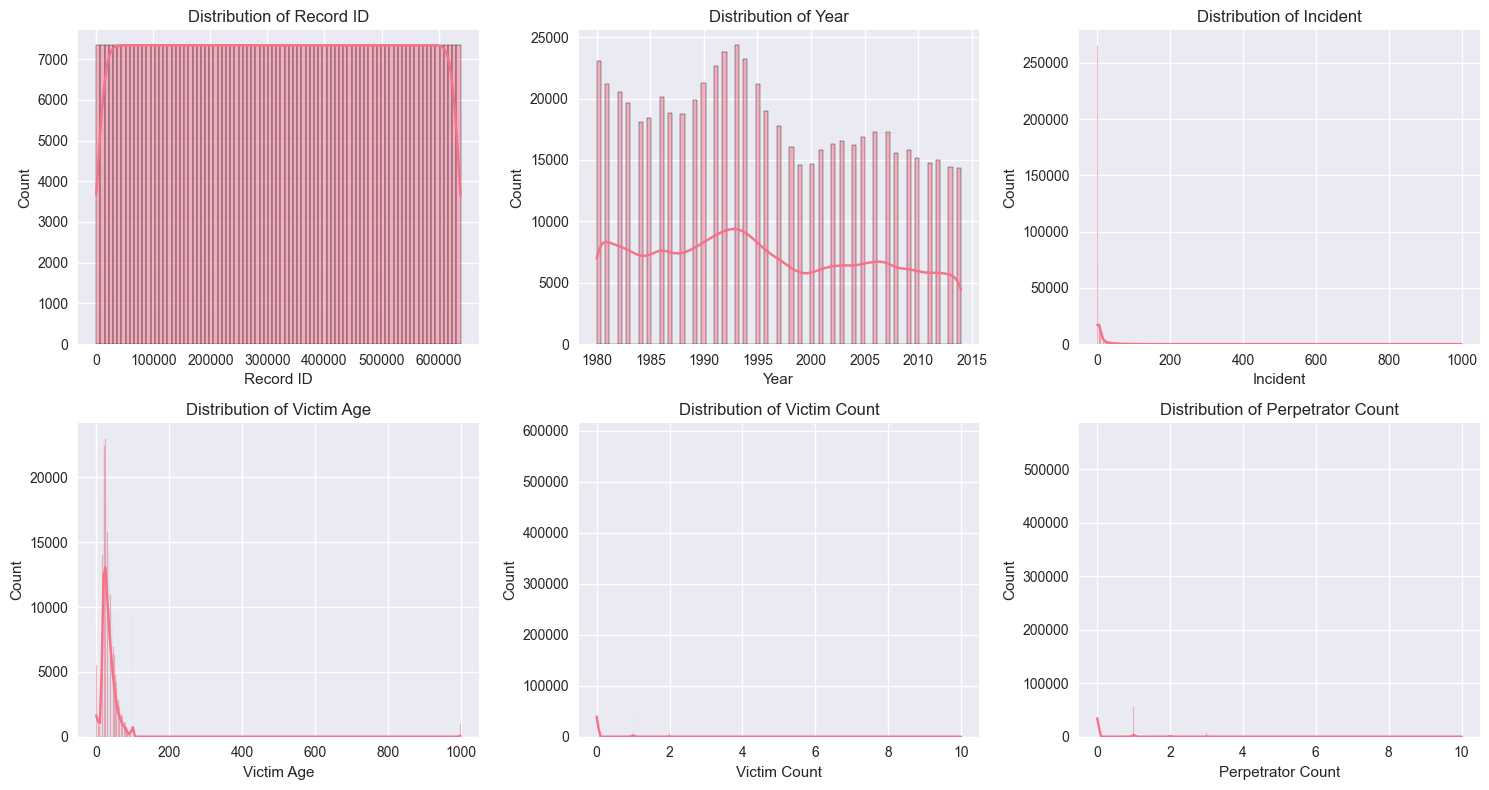

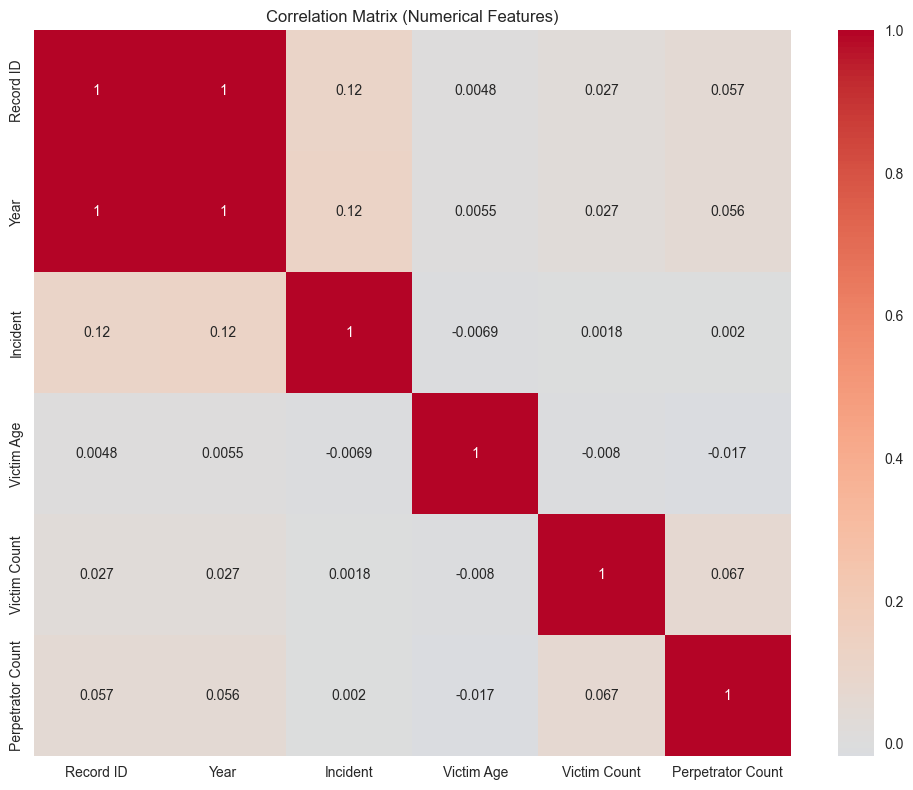

In [9]:
# Data distribution visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Get only numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
n_cols = len(numerical_cols)
n_rows = (n_cols + 2) // 3  # 3 plots per row

# Create a figure for visualizing numerical distributions
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 4*n_rows))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, kde=True, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}')

# Remove empty subplots if any
for idx in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

# Correlation heatmap for numerical columns only
numerical_df = df[numerical_cols]
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix (Numerical Features)')
plt.tight_layout()
plt.show()

Categorical variables summary:

Agency Code value counts:


Agency Code
NY03030    38416
CA01942    23663
ILCPD00    21331
MI82349    17206
TXHPD00    12881
           ...  
LA01001        1
LA04307        1
MA01212        1
ME00513        1
ME00903        1
Name: count, Length: 12003, dtype: int64

Agency Code value counts (percentage):


Agency Code
NY03030    6.017035
CA01942    3.706297
ILCPD00    3.341039
MI82349    2.694947
TXHPD00    2.017530
             ...   
LA01001    0.000157
LA04307    0.000157
MA01212    0.000157
ME00513    0.000157
ME00903    0.000157
Name: proportion, Length: 12003, dtype: float64

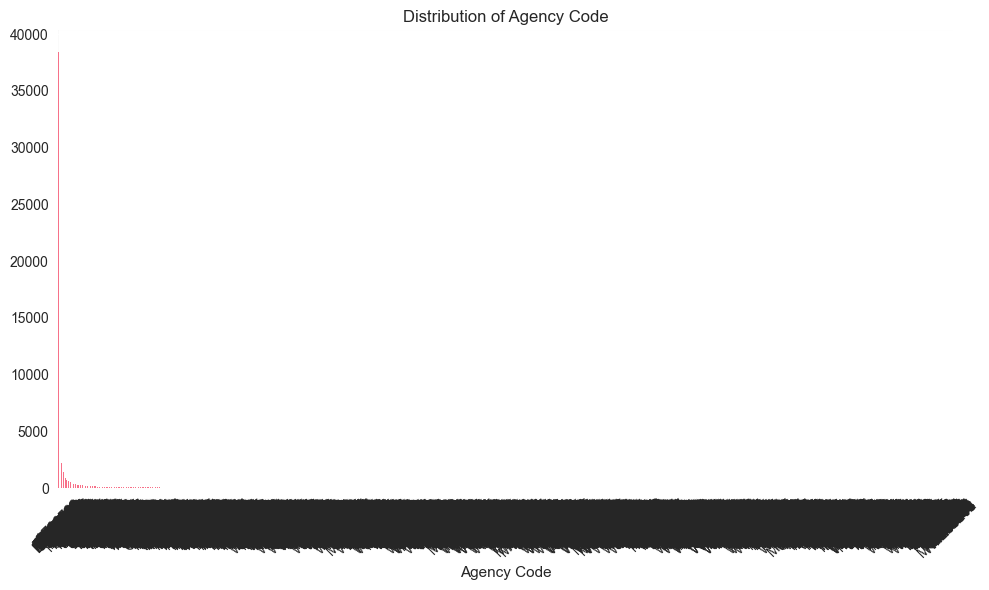


Agency Name value counts:


Agency Name
New York              38416
Los Angeles           29007
Chicago               21331
Detroit               17206
Houston               13046
                      ...  
Ashland County            1
Barron County             1
Chippewa County           1
Fond Du Lac County        1
Iowa County               1
Name: count, Length: 9216, dtype: int64

Agency Name value counts (percentage):


Agency Name
New York              6.017035
Los Angeles           4.543319
Chicago               3.341039
Detroit               2.694947
Houston               2.043374
                        ...   
Ashland County        0.000157
Barron County         0.000157
Chippewa County       0.000157
Fond Du Lac County    0.000157
Iowa County           0.000157
Name: proportion, Length: 9216, dtype: float64

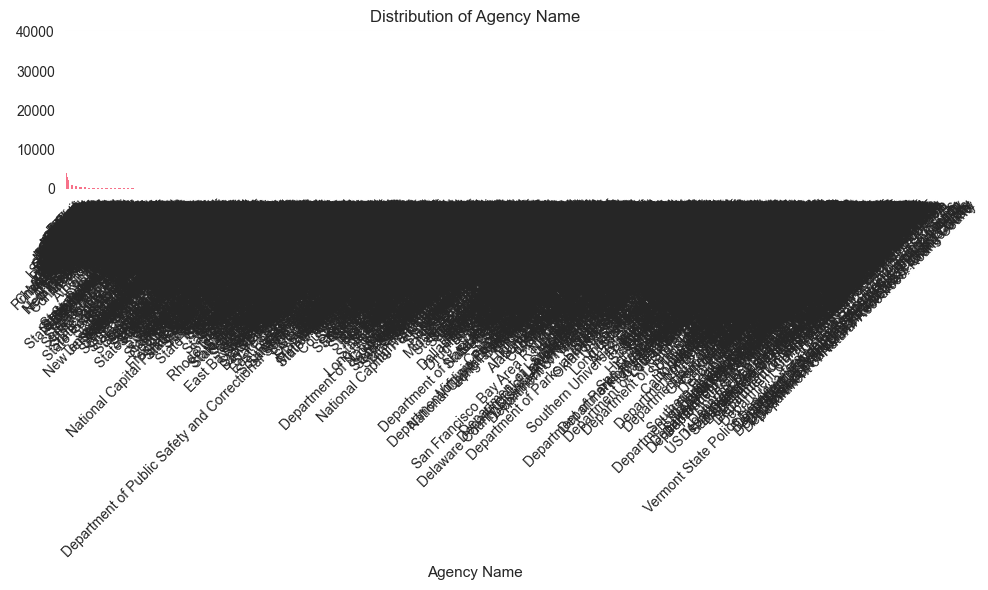


Agency Type value counts:


Agency Type
Municipal Police    493026
Sheriff             105322
County Police        22693
State Police         14235
Special Police        2889
Regional Police        235
Tribal Police           54
Name: count, dtype: int64

Agency Type value counts (percentage):


Agency Type
Municipal Police    77.221852
Sheriff             16.496412
County Police        3.554367
State Police         2.229605
Special Police       0.452499
Regional Police      0.036808
Tribal Police        0.008458
Name: proportion, dtype: float64

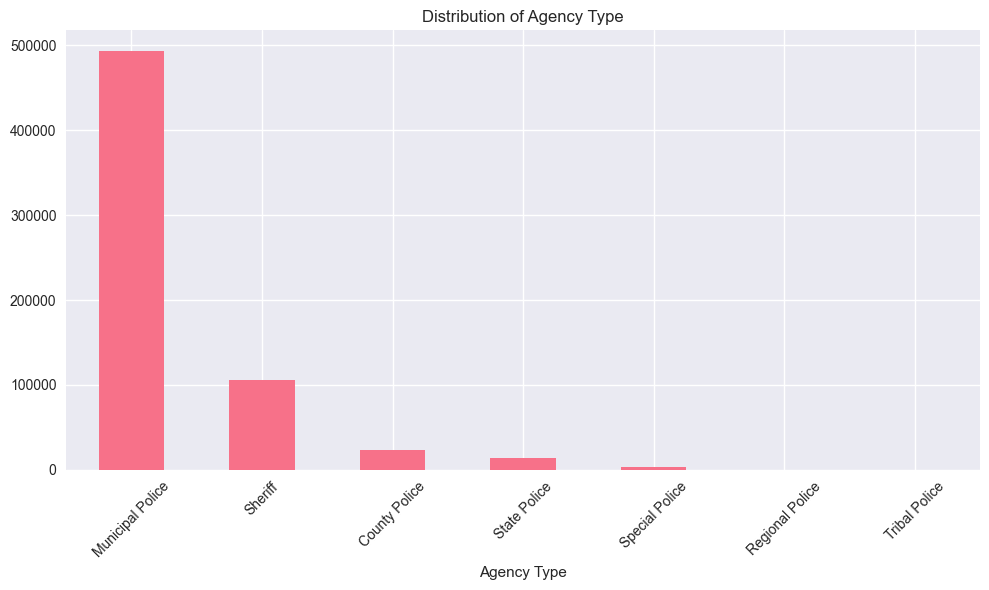


City value counts:


City
Los Angeles    44511
New York       38431
Cook           22383
Wayne          19904
Harris         16331
               ...  
Palo Alto          1
Perkins            1
Moultrie           1
Rooks              1
McCone             1
Name: count, Length: 1782, dtype: int64

City value counts (percentage):


City
Los Angeles    6.971685
New York       6.019384
Cook           3.505812
Wayne          3.117531
Harris         2.557898
                 ...   
Palo Alto      0.000157
Perkins        0.000157
Moultrie       0.000157
Rooks          0.000157
McCone         0.000157
Name: proportion, Length: 1782, dtype: float64

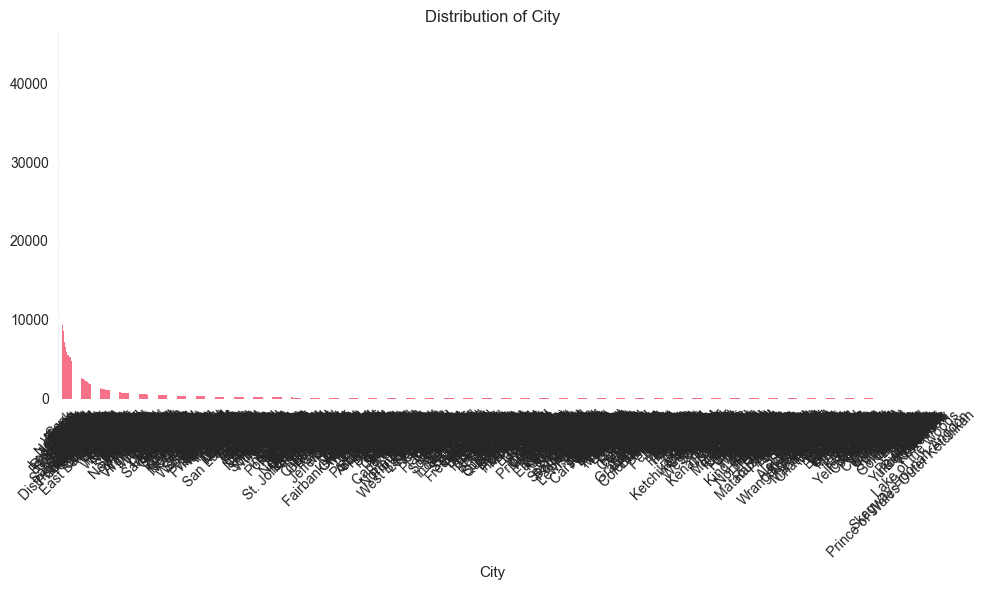


State value counts:


State
California              99783
Texas                   62095
New York                49268
Florida                 37164
Michigan                28448
Illinois                25871
Pennsylvania            24236
Georgia                 21088
North Carolina          20390
Louisiana               19629
Ohio                    19158
Maryland                17312
Virginia                15520
Tennessee               14930
Missouri                14832
New Jersey              14132
Arizona                 12871
South Carolina          11698
Indiana                 11463
Alabama                 11376
Oklahoma                 8809
Washington               7815
District of Columbia     7115
Arkansas                 6947
Colorado                 6593
Kentucky                 6554
Mississippi              6546
Wisconsin                6191
Massachusetts            6036
Nevada                   5553
Connecticut              4896
New Mexico               4272
Oregon                   4217
Minn

State value counts (percentage):


State
California              15.628847
Texas                    9.725838
New York                 7.716766
Florida                  5.820936
Michigan                 4.455763
Illinois                 4.052132
Pennsylvania             3.796045
Georgia                  3.302979
North Carolina           3.193652
Louisiana                3.074458
Ohio                     3.000686
Maryland                 2.711550
Virginia                 2.430872
Tennessee                2.338461
Missouri                 2.323112
New Jersey               2.213472
Arizona                  2.015964
South Carolina           1.832239
Indiana                  1.795431
Alabama                  1.781804
Oklahoma                 1.379739
Washington               1.224051
District of Columbia     1.114411
Arkansas                 1.088097
Colorado                 1.032651
Kentucky                 1.026542
Mississippi              1.025289
Wisconsin                0.969686
Massachusetts            0.945409
Nevada  

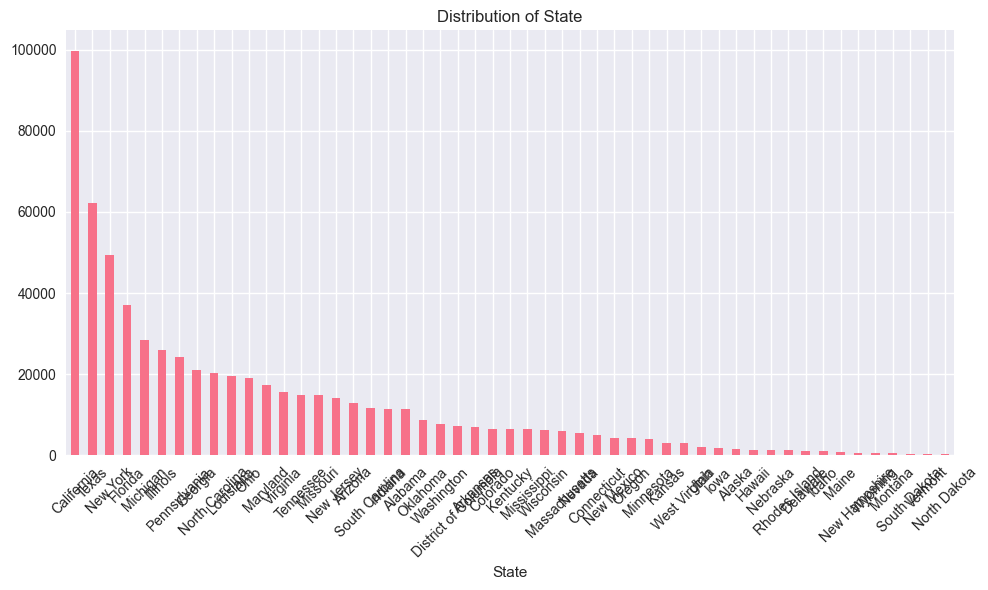


Month value counts:


Month
July         58696
August       58072
December     55187
September    54117
June         53662
October      53650
May          53394
January      52928
March        51444
April        51209
November     50016
February     46079
Name: count, dtype: int64

Month value counts (percentage):


Month
July         9.193458
August       9.095722
December     8.643849
September    8.476257
June         8.404991
October      8.403111
May          8.363014
January      8.290026
March        8.057589
April        8.020781
November     7.833924
February     7.217278
Name: proportion, dtype: float64

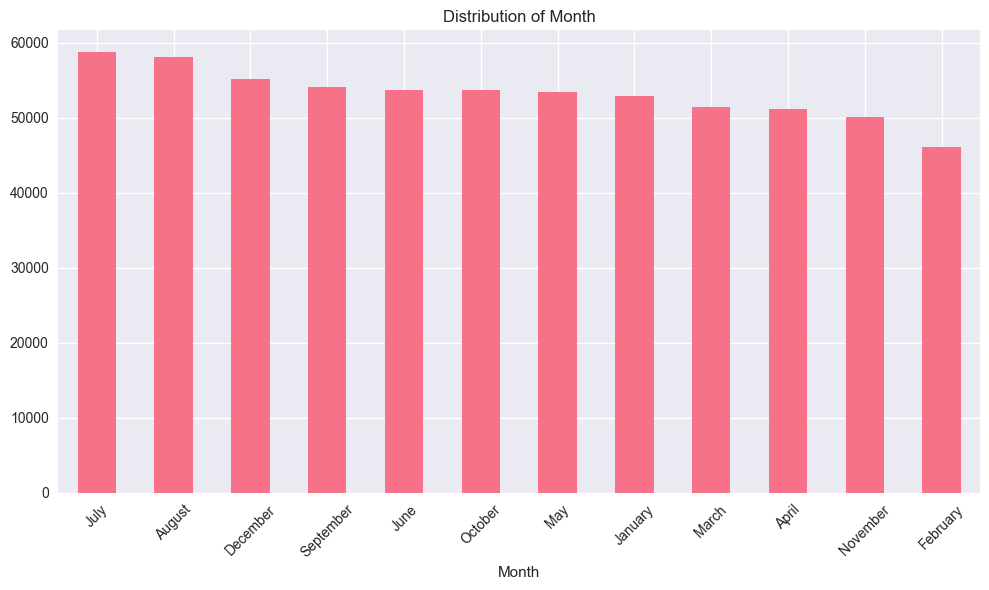


Crime Type value counts:


Crime Type
Murder or Manslaughter        629338
Manslaughter by Negligence      9116
Name: count, dtype: int64

Crime Type value counts (percentage):


Crime Type
Murder or Manslaughter        98.572176
Manslaughter by Negligence     1.427824
Name: proportion, dtype: float64

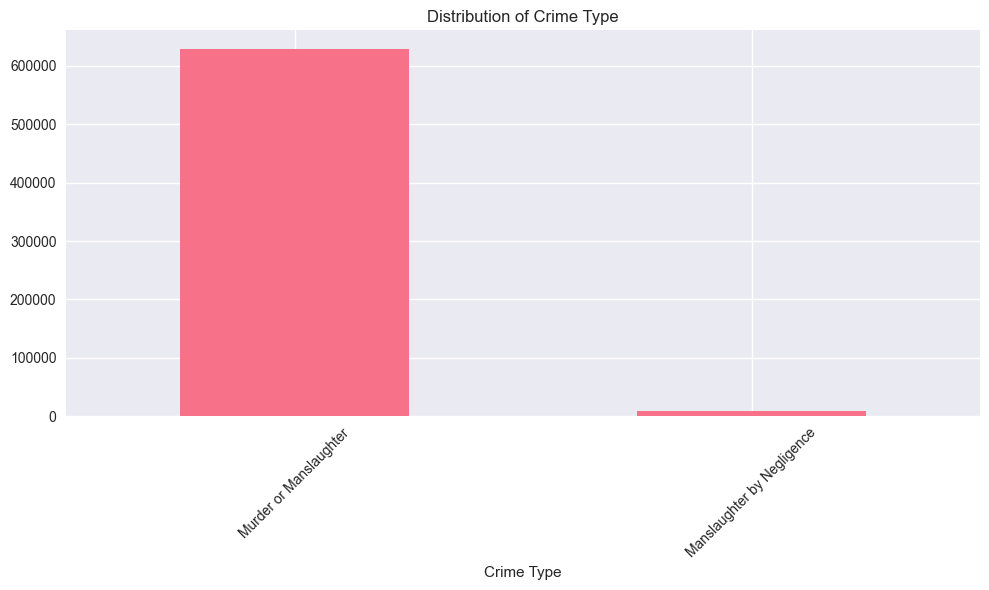


Crime Solved value counts:


Crime Solved
Yes    448172
No     190282
Name: count, dtype: int64

Crime Solved value counts (percentage):


Crime Solved
Yes    70.196443
No     29.803557
Name: proportion, dtype: float64

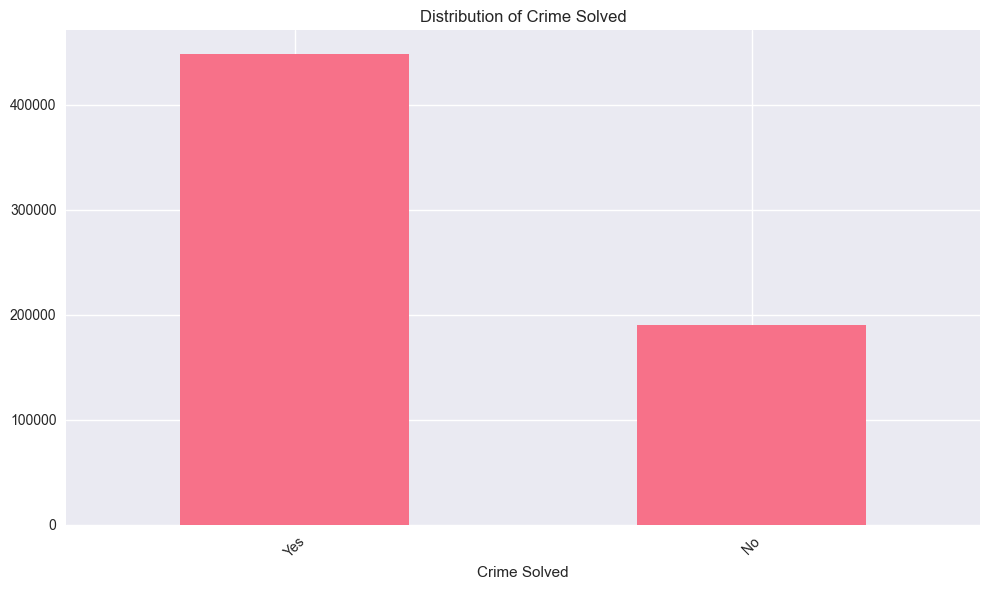


Victim Sex value counts:


Victim Sex
Male       494125
Female     143345
Unknown       984
Name: count, dtype: int64

Victim Sex value counts (percentage):


Victim Sex
Male       77.393986
Female     22.451892
Unknown     0.154122
Name: proportion, dtype: float64

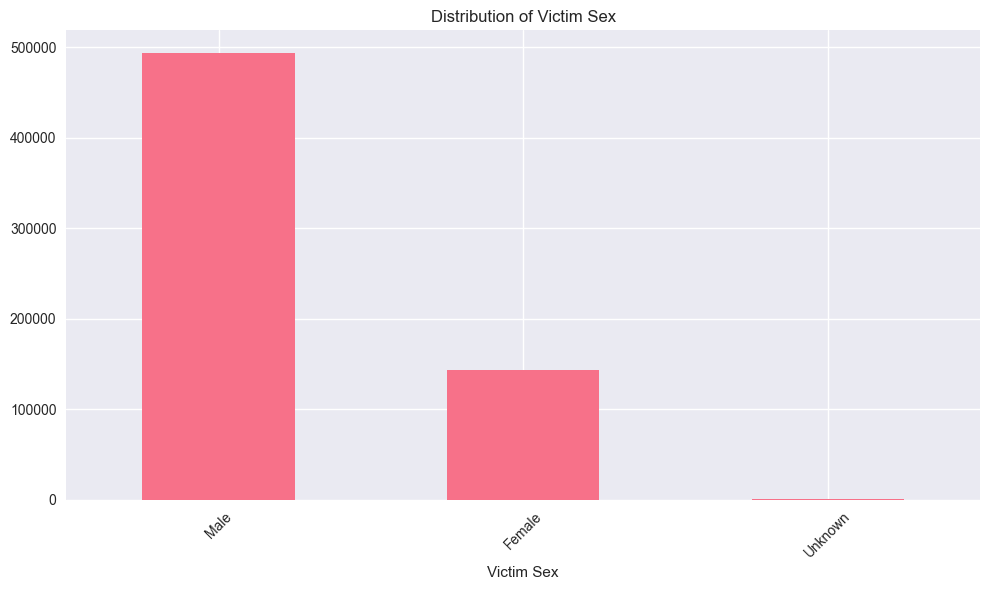


Victim Race value counts:


Victim Race
White                            317422
Black                            299899
Asian/Pacific Islander             9890
Unknown                            6676
Native American/Alaska Native      4567
Name: count, dtype: int64

Victim Race value counts (percentage):


Victim Race
White                            49.717286
Black                            46.972687
Asian/Pacific Islander            1.549054
Unknown                           1.045651
Native American/Alaska Native     0.715322
Name: proportion, dtype: float64

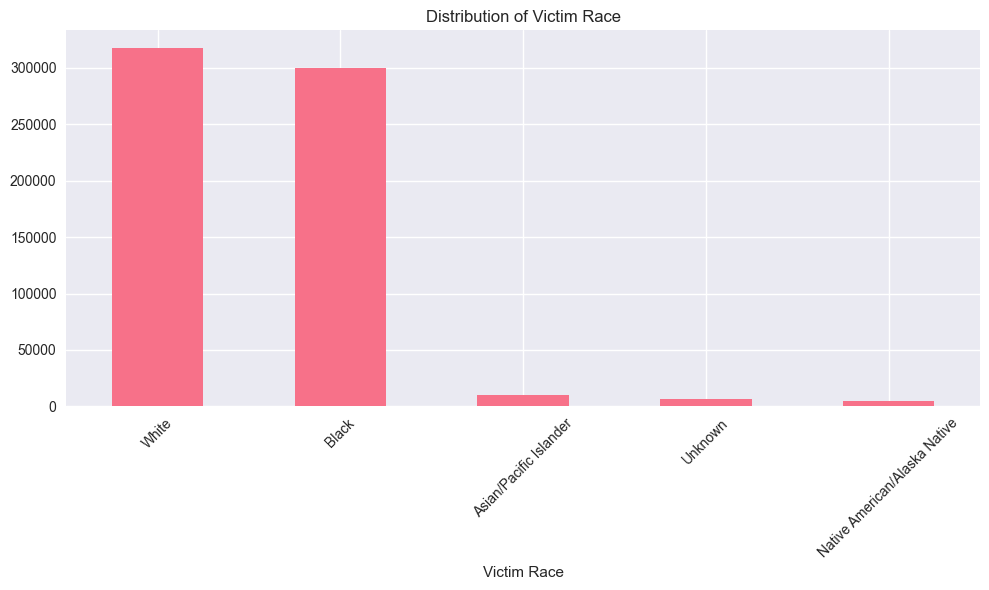


Victim Ethnicity value counts:


Victim Ethnicity
Unknown         368303
Not Hispanic    197499
Hispanic         72652
Name: count, dtype: int64

Victim Ethnicity value counts (percentage):


Victim Ethnicity
Unknown         57.686693
Not Hispanic    30.933944
Hispanic        11.379363
Name: proportion, dtype: float64

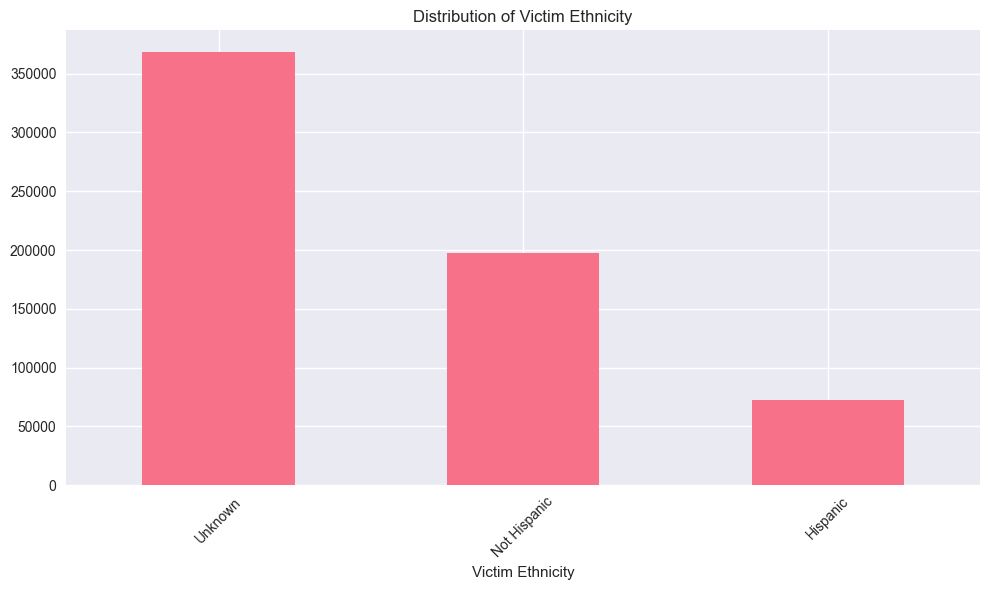


Perpetrator Sex value counts:


Perpetrator Sex
Male       399541
Unknown    190365
Female      48548
Name: count, dtype: int64

Perpetrator Sex value counts (percentage):


Perpetrator Sex
Male       62.579450
Unknown    29.816557
Female      7.603993
Name: proportion, dtype: float64

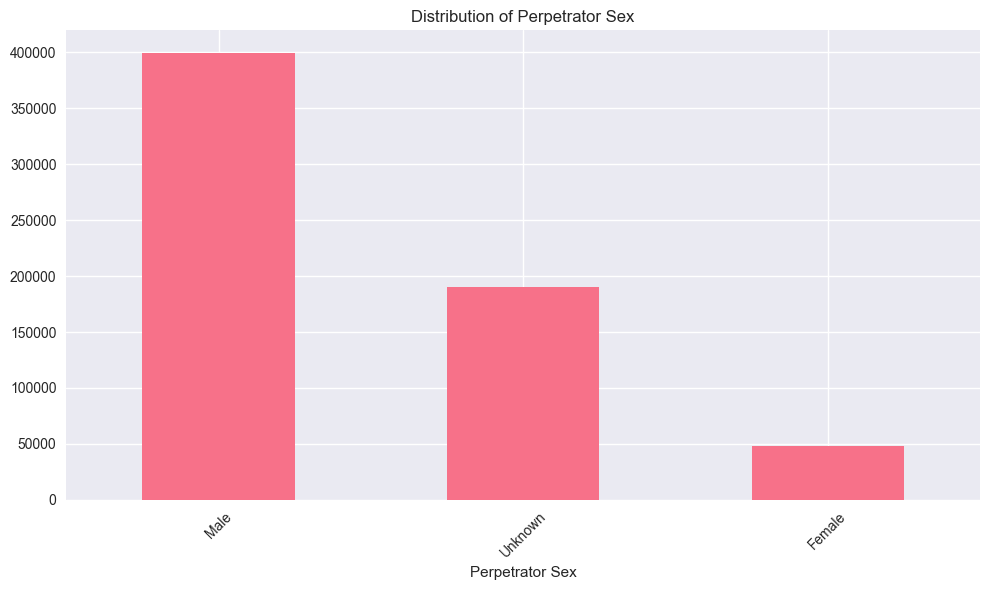


Perpetrator Age value counts:


Perpetrator Age
0     211079
20     21158
19     19807
21     18509
18     18477
       ...  
93         1
           1
10         1
92         1
1          1
Name: count, Length: 191, dtype: int64

Perpetrator Age value counts (percentage):


Perpetrator Age
0     33.060957
20     3.313943
19     3.102338
21     2.899034
18     2.894022
        ...    
93     0.000157
       0.000157
10     0.000157
92     0.000157
1      0.000157
Name: proportion, Length: 191, dtype: float64

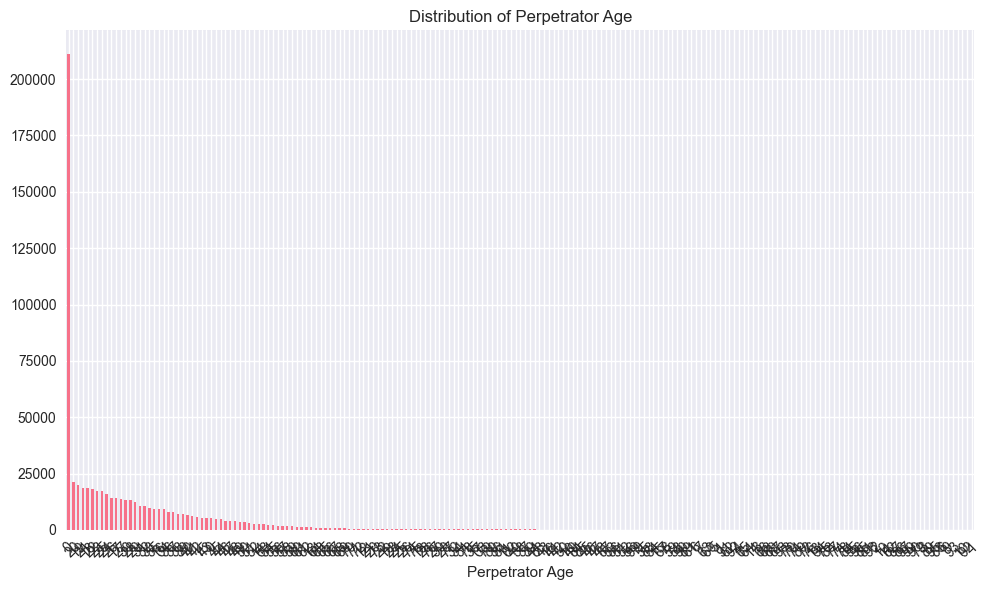


Perpetrator Race value counts:


Perpetrator Race
White                            218243
Black                            214516
Unknown                          196047
Asian/Pacific Islander             6046
Native American/Alaska Native      3602
Name: count, dtype: int64

Perpetrator Race value counts (percentage):


Perpetrator Race
White                            34.183042
Black                            33.599288
Unknown                          30.706519
Asian/Pacific Islander            0.946975
Native American/Alaska Native     0.564175
Name: proportion, dtype: float64

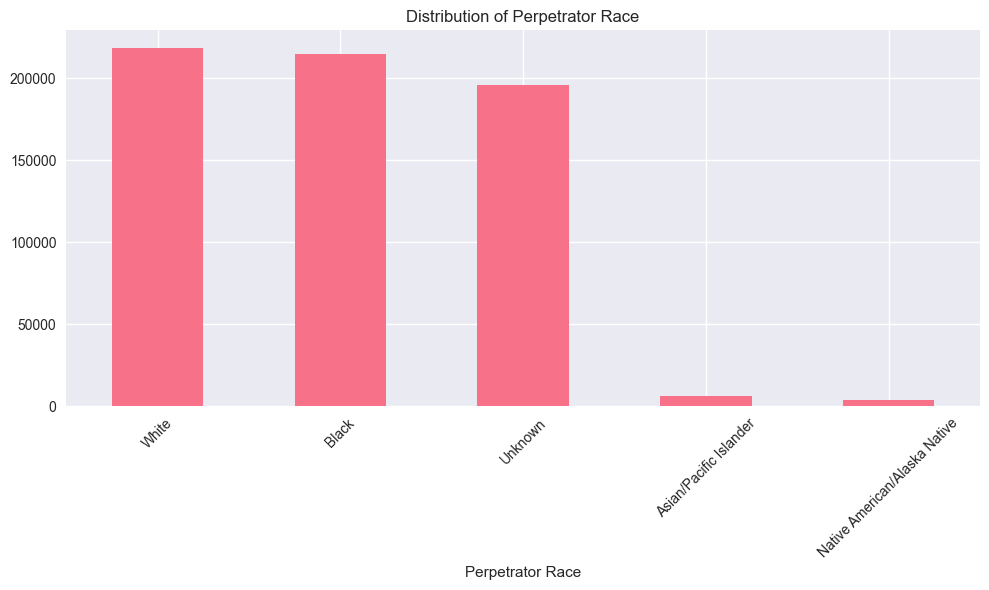


Perpetrator Ethnicity value counts:


Perpetrator Ethnicity
Unknown         446410
Not Hispanic    145172
Hispanic         46872
Name: count, dtype: int64

Perpetrator Ethnicity value counts (percentage):


Perpetrator Ethnicity
Unknown         69.920464
Not Hispanic    22.738052
Hispanic         7.341484
Name: proportion, dtype: float64

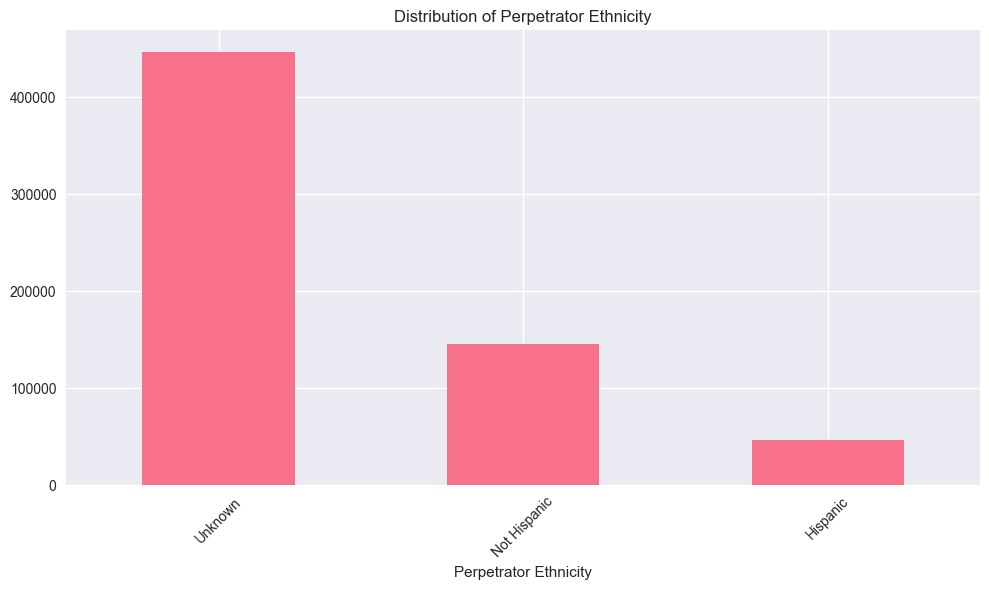


Relationship value counts:


Relationship
Unknown                 273013
Acquaintance            126018
Stranger                 96593
Wife                     23187
Friend                   21945
Girlfriend               16465
Son                       9904
Family                    9535
Husband                   8803
Daughter                  7539
Boyfriend                 7302
Neighbor                  6294
Brother                   5514
Father                    4361
Mother                    4248
In-Law                    3637
Common-Law Wife           2477
Ex-Wife                   1973
Common-Law Husband        1954
Boyfriend/Girlfriend      1383
Stepfather                1360
Sister                    1292
Stepson                   1170
Stepdaughter               754
Ex-Husband                 629
Employer                   509
Employee                   384
Stepmother                 211
Name: count, dtype: int64

Relationship value counts (percentage):


Relationship
Unknown                 42.761577
Acquaintance            19.737992
Stranger                15.129203
Wife                     3.631742
Friend                   3.437209
Girlfriend               2.578886
Son                      1.551247
Family                   1.493451
Husband                  1.378799
Daughter                 1.180821
Boyfriend                1.143700
Neighbor                 0.985819
Brother                  0.863649
Father                   0.683056
Mother                   0.665357
In-Law                   0.569657
Common-Law Wife          0.387968
Ex-Wife                  0.309028
Common-Law Husband       0.306052
Boyfriend/Girlfriend     0.216617
Stepfather               0.213015
Sister                   0.202364
Stepson                  0.183255
Stepdaughter             0.118098
Ex-Husband               0.098519
Employer                 0.079724
Employee                 0.060145
Stepmother               0.033049
Name: proportion, dtype: float64

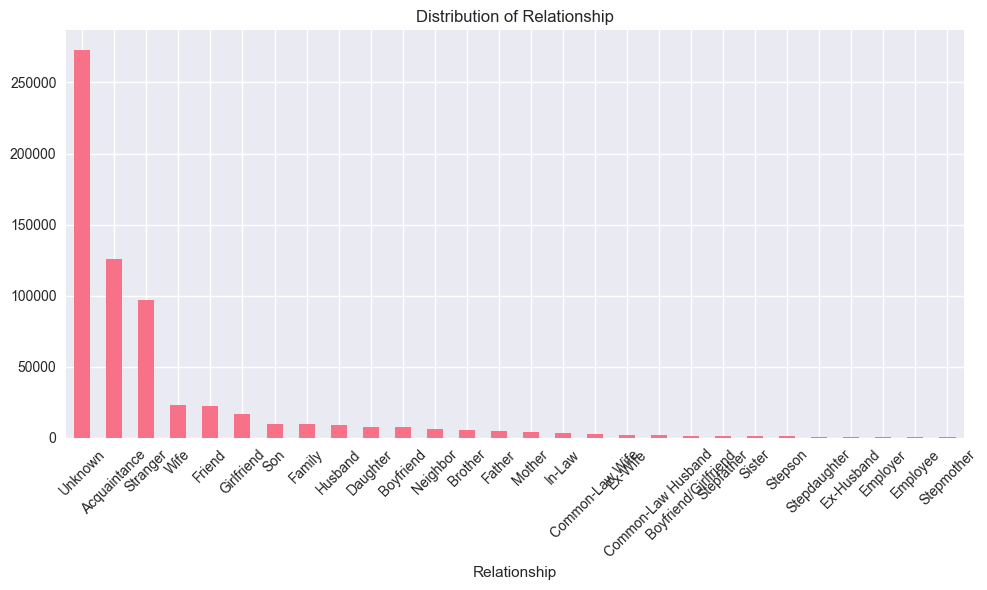


Weapon value counts:


Weapon
Handgun          317484
Knife             94962
Blunt Object      67337
Firearm           46980
Unknown           33192
Shotgun           30722
Rifle             23347
Strangulation      8110
Fire               6173
Suffocation        3968
Gun                2206
Drugs              1588
Drowning           1204
Explosives          537
Poison              454
Fall                190
Name: count, dtype: int64

Weapon value counts (percentage):


Weapon
Handgun          49.726997
Knife            14.873742
Blunt Object     10.546884
Firearm           7.358400
Unknown           5.198808
Shotgun           4.811936
Rifle             3.656802
Strangulation     1.270256
Fire              0.966867
Suffocation       0.621501
Gun               0.345522
Drugs             0.248726
Drowning          0.188581
Explosives        0.084109
Poison            0.071109
Fall              0.029759
Name: proportion, dtype: float64

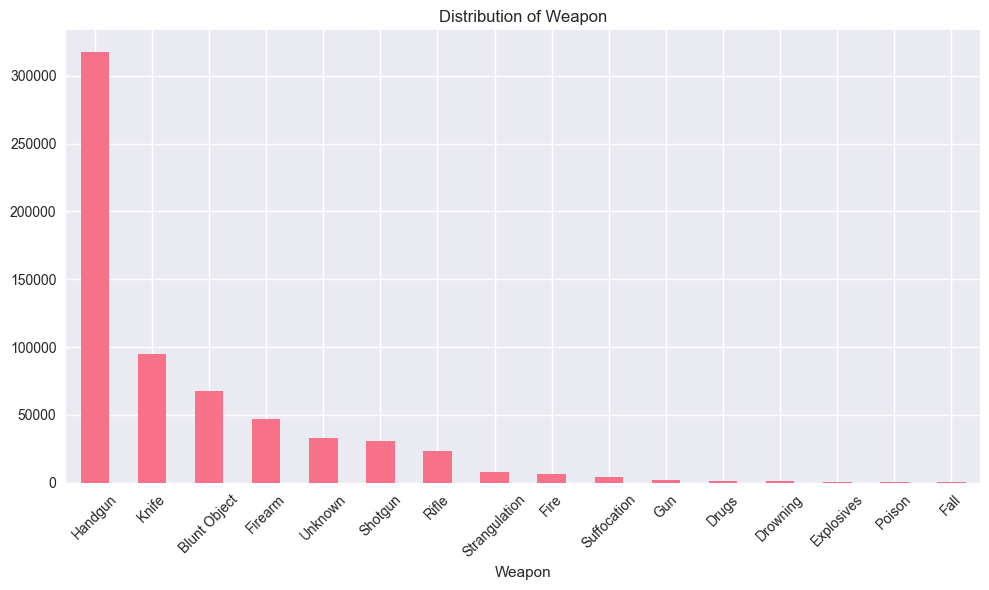


Record Source value counts:


Record Source
FBI     616647
FOIA     21807
Name: count, dtype: int64

Record Source value counts (percentage):


Record Source
FBI     96.584405
FOIA     3.415595
Name: proportion, dtype: float64

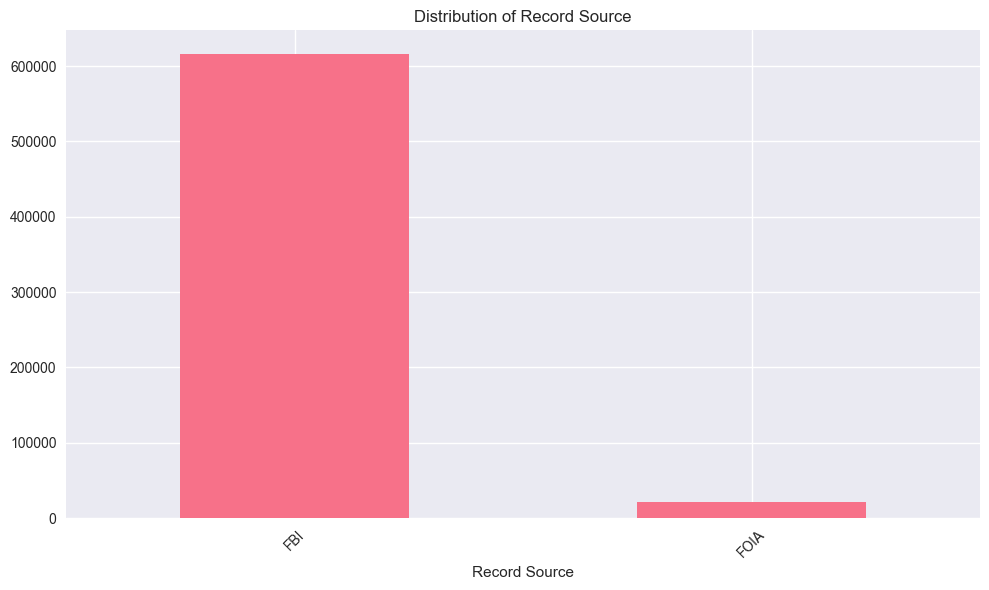

In [10]:
# Categorical variables analysis
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

print("Categorical variables summary:")
for col in categorical_cols:
    print(f"\n{col} value counts:")
    display(df[col].value_counts())
    print(f"{col} value counts (percentage):")
    display(df[col].value_counts(normalize=True).multiply(100))
    
    # Create a bar plot for the categorical variable
    plt.figure(figsize=(10, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Target Variable Analysis

Target variable (Crime Type) distribution:


Crime Type
Murder or Manslaughter        629338
Manslaughter by Negligence      9116
Name: count, dtype: int64

Crime Type
Murder or Manslaughter        98.572176
Manslaughter by Negligence     1.427824
Name: proportion, dtype: float64

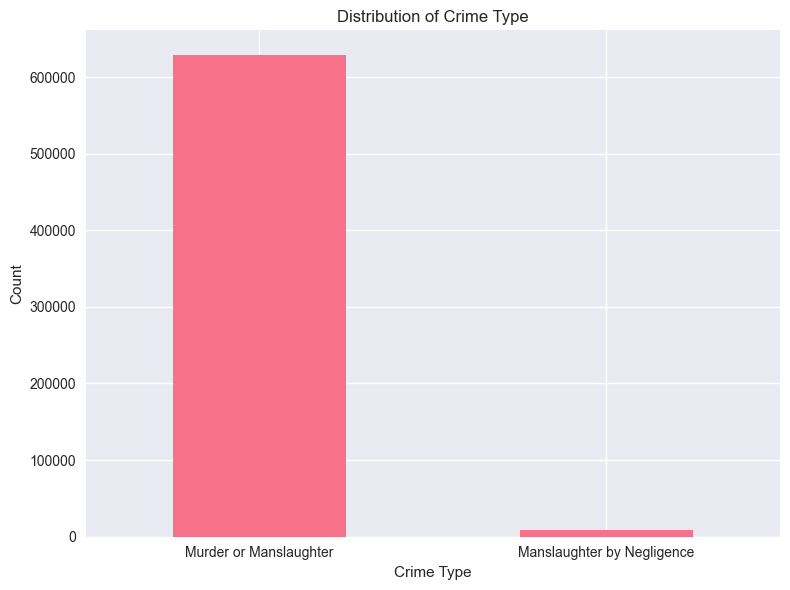

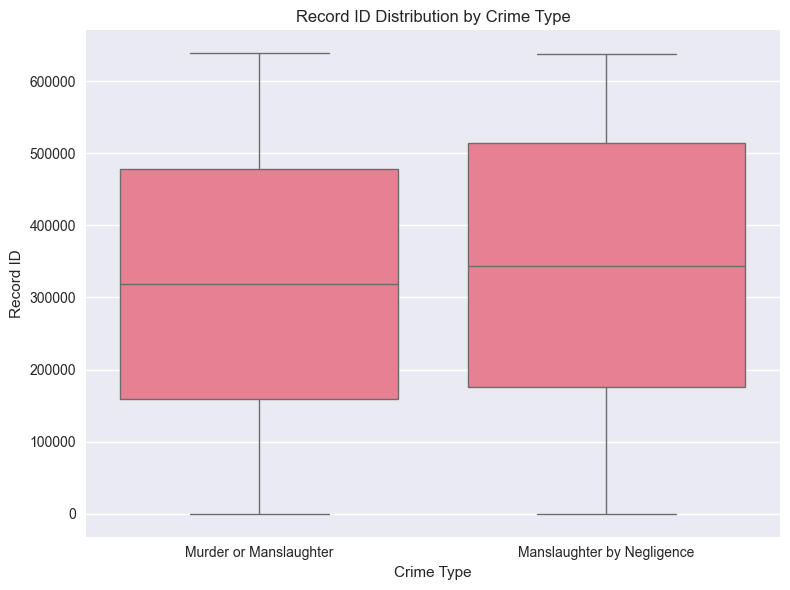

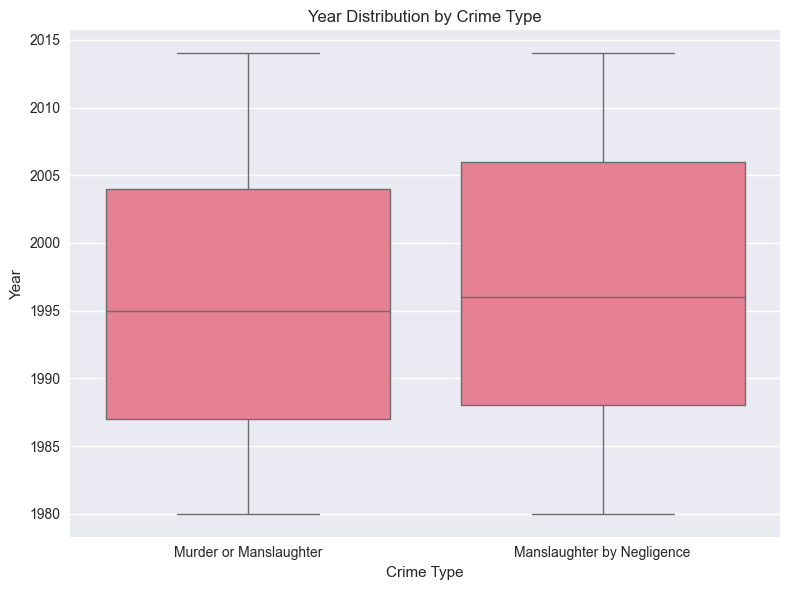

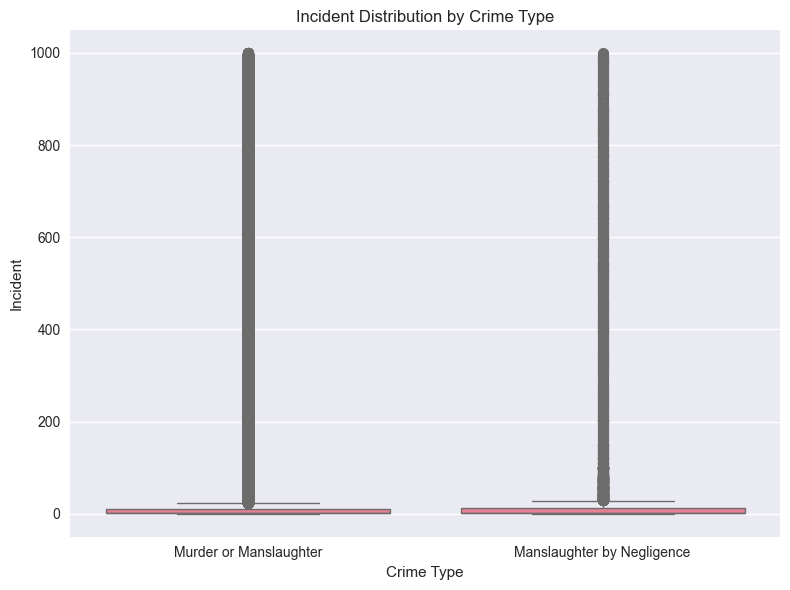

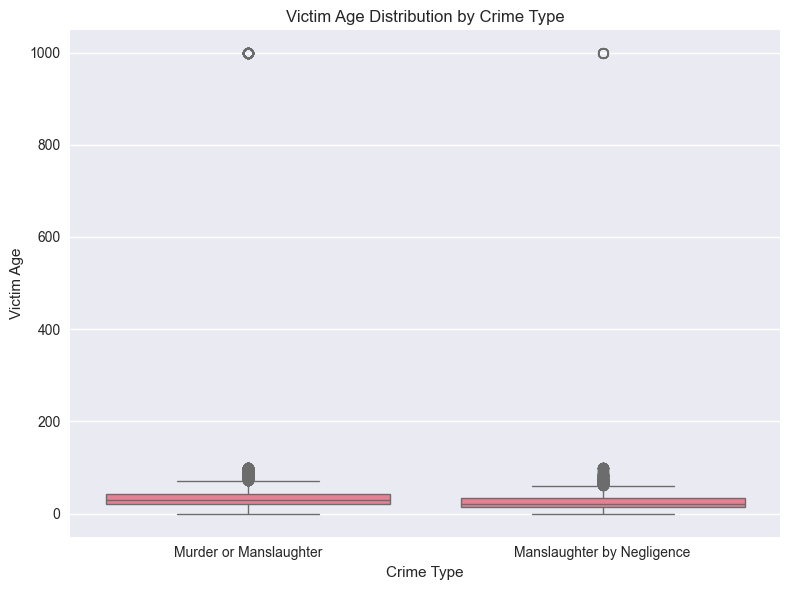

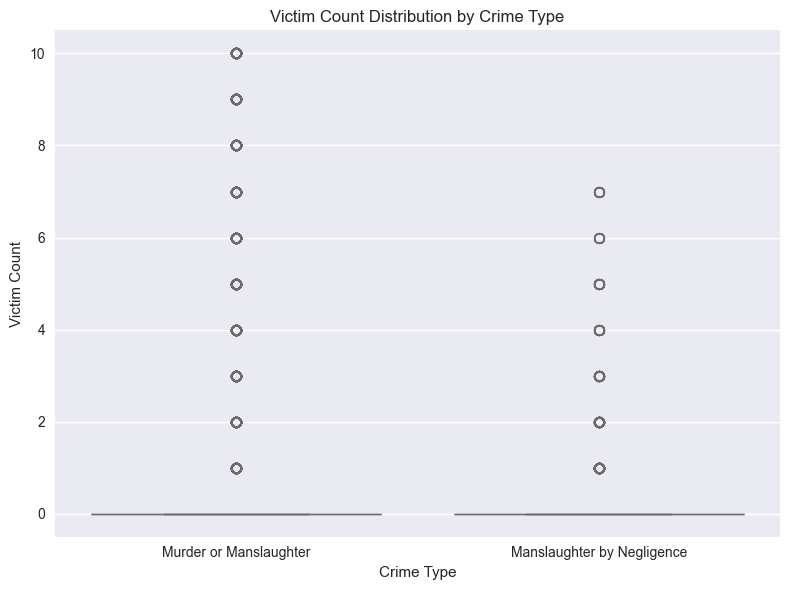

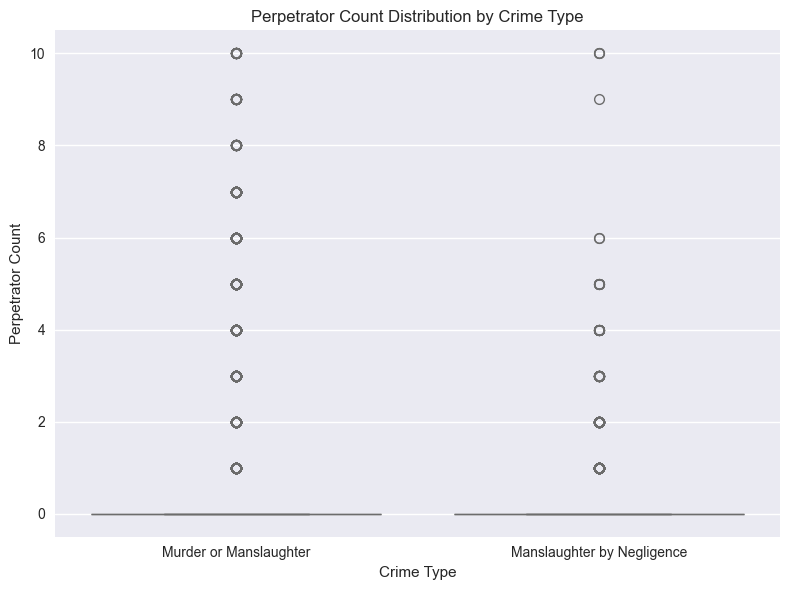


Chi-square test results for categorical variables:

Agency Code:
Chi-square statistic: 41549.15
p-value: 0.0000

Agency Code:
Chi-square statistic: 41549.15
p-value: 0.0000

Agency Name:
Chi-square statistic: 35557.17
p-value: 0.0000

Agency Type:
Chi-square statistic: 1028.13
p-value: 0.0000

Agency Name:
Chi-square statistic: 35557.17
p-value: 0.0000

Agency Type:
Chi-square statistic: 1028.13
p-value: 0.0000

City:
Chi-square statistic: 12152.68
p-value: 0.0000

State:
Chi-square statistic: 5719.64
p-value: 0.0000

City:
Chi-square statistic: 12152.68
p-value: 0.0000

State:
Chi-square statistic: 5719.64
p-value: 0.0000

Month:
Chi-square statistic: 50.06
p-value: 0.0000

Crime Solved:
Chi-square statistic: 2883.84
p-value: 0.0000

Month:
Chi-square statistic: 50.06
p-value: 0.0000

Crime Solved:
Chi-square statistic: 2883.84
p-value: 0.0000

Victim Sex:
Chi-square statistic: 26.40
p-value: 0.0000

Victim Race:
Chi-square statistic: 1327.73
p-value: 0.0000

Victim Ethnicity:
Chi-sq

In [12]:
# Analyze target variable distribution
target_col = 'Crime Type'  # Using the correct column name from the dataset
print(f"Target variable ({target_col}) distribution:")
display(df[target_col].value_counts())
display(df[target_col].value_counts(normalize=True).multiply(100))

plt.figure(figsize=(8, 6))
df[target_col].value_counts().plot(kind='bar')
plt.title(f'Distribution of {target_col}')
plt.xlabel(target_col)
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Feature relationships with target variable
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = numerical_cols.drop(target_col) if target_col in numerical_cols else numerical_cols

# Box plots for numerical features by target
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=target_col, y=col, data=df)
    plt.title(f'{col} Distribution by {target_col}')
    plt.tight_layout()
    plt.show()

# Chi-square test for categorical variables
from scipy.stats import chi2_contingency

categorical_cols = df.select_dtypes(include=['object', 'category']).columns
categorical_cols = categorical_cols.drop(target_col) if target_col in categorical_cols else categorical_cols

print("\nChi-square test results for categorical variables:")
for col in categorical_cols:
    contingency_table = pd.crosstab(df[target_col], df[col])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"\n{col}:")
    print(f"Chi-square statistic: {chi2:.2f}")
    print(f"p-value: {p_value:.4f}")